# Predictability in metals speads and interest rates
Recent person on podcast mentioned how the metals markets predicts interest rates in particular the spreaed between copper (base) and gold (precious).  However, results show below that statistically it hasn't been significant (I've also tried monthly, weekly, and quarterly look aheads).  Metals data comes from the futures time series and the yields are the US 10 Year constant maturity yields from the Federal Reserve data.

In [34]:
%matplotlib inline
import pylab
import pandas as pd
import numpy as np
import quandl
import seaborn as sns
import numpy as np
import statsmodels.api as sm

token="Us3wFmXGgAj_1cUtHAAR"
import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

In [2]:
#tres=quandl.get("USTREASURY/YIELD", authtoken=token)['10 YR']
df=pd.DataFrame()
df['Yield']=quandl.get("FRED/DGS10").VALUE
df['Copper']=quandl.get("CHRIS/CME_HG1", authtoken=token).Settle
df['Gold']=quandl.get("CHRIS/CME_GC1", authtoken=token).Settle

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


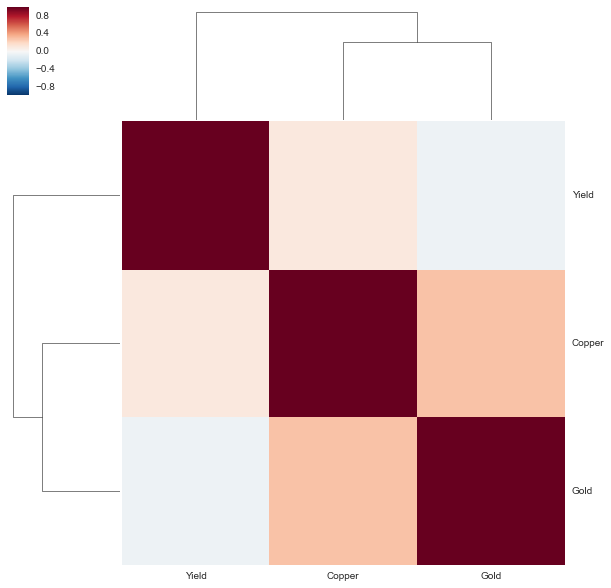

In [3]:
sns.clustermap(df.pct_change().corr())

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


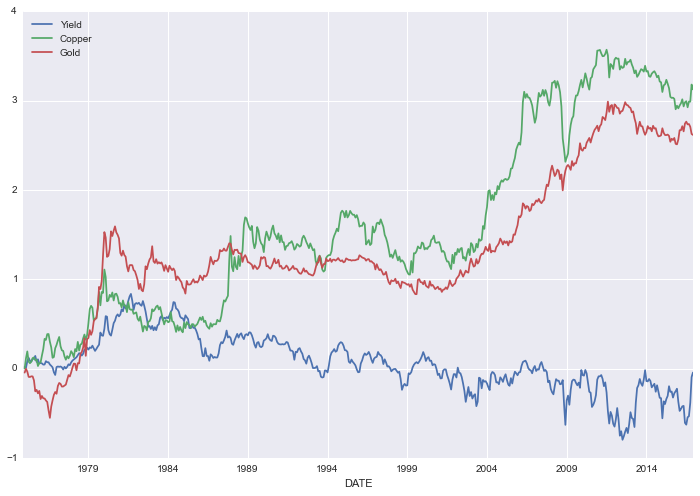

In [9]:
df.dropna().resample(rule='m',how='last').pct_change().cumsum().plot()

In [78]:
df2=df.dropna().resample(rule='m',how='last').pct_change()
df2['Change']=df2.Copper-df2.Gold

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [79]:
Y=df2.Yield
X = pd.DataFrame()
X['Difference between Gold and Copper']=df2.Change.shift(1).dropna()
X['Alpha']=1
r= sm.OLS(Y[X.index].dropna(),X).fit()
print r.summary()

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.269
Date:                Mon, 02 Jan 2017   Prob (F-statistic):              0.133
Time:                        17:36:46   Log-Likelihood:                 666.66
No. Observations:                 503   AIC:                            -1329.
Df Residuals:                     501   BIC:                            -1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Diff